In [2]:
import pygame
print( pygame.ver)


pygame 1.9.4
Hello from the pygame community. https://www.pygame.org/contribute.html
1.9.4


# 模块名称

模块名	|功能
- | -: |
pygame.cdrom	|访问光驱
pygame.cursors	|加载光标
pygame.display	|访问显示设备
pygame.draw	|绘制形状、线和点
pygame.event	|管理事件
pygame.font	|使用字体
pygame.image	|加载和存储图片
pygame.joystick	|使用游戏手柄或者 类似的东西
pygame.key	|读取键盘按键
pygame.mixer	|声音
pygame.mouse	|鼠标
pygame.movie	|播放视频
pygame.music	|播放音频
pygame.overlay	|访问高级视频叠加
pygame	|就是我们在学的这个东西了……
pygame.rect	|管理矩形区域
pygame.sndarray	|操作声音数据
pygame.sprite	|操作移动图像
pygame.surface	|管理图像和屏幕
pygame.surfarray	|管理点阵图像数据
pygame.time	|管理时间和帧信息
pygame.transform	|缩放和移动图像

----------------

事件	|产生途径	|参数
- | :-: |:-: 
QUIT	|用户按下关闭按钮	|none
ATIVEEVENT	|Pygame被激活或者隐藏	|gain, state
KEYDOWN	|键盘被按下	|unicode, key, mod
KEYUP	|键盘被放开	|key, mod
MOUSEMOTION	|鼠标移动	|pos, rel, buttons
MOUSEBUTTONDOWN	|鼠标按下	|pos, button
MOUSEBUTTONUP	|鼠标放开	|pos, button
JOYAXISMOTION	|游戏手柄(Joystick or pad)移动	|joy, axis, value
JOYBALLMOTION	|游戏球(Joy ball)?移动	|joy, axis, value
JOYHATMOTION	|游戏手柄(Joystick)?移动	|joy, axis, value
JOYBUTTONDOWN	|游戏手柄按下	|joy, button
JOYBUTTONUP	|游戏手柄放开	|joy, button
VIDEORESIZE	|Pygame窗口缩放	|size, w, h
VIDEOEXPOSE	|Pygame窗口部分公开(expose)?	|none
USEREVENT	|触发了一个用户事件	|code


--------------
<table>
<thead>
<tr>
<th>函数</th>
<th>作用</th>
</tr>
</thead>
<tbody>
<tr>
<td>rect</td>
<td>绘制矩形</td>
</tr>
<tr>
<td>polygon</td>
<td>绘制多边形（三个及三个以上的边）</td>
</tr>
<tr>
<td>circle</td>
<td>绘制圆</td>
</tr>
<tr>
<td>ellipse</td>
<td>绘制椭圆</td>
</tr>
<tr>
<td>arc</td>
<td>绘制圆弧</td>
</tr>
<tr>
<td>line</td>
<td>绘制线</td>
</tr>
<tr>
<td>lines</td>
<td>绘制一系列的线</td>
</tr>
<tr>
<td>aaline</td>
<td>绘制一根平滑的线</td>
</tr>
<tr>
<td>aalines</td>
<td>绘制一系列平滑的线</td>
</tr>
</tbody>
</table>

# new

In [ ]:
background_image_filename = 'sushiplate.jpg'
mouse_image_filename = 'fugu.png'
#指定图像文件名称
 
import pygame
#导入pygame库
from pygame.locals import *
#导入一些常用的函数和常量
from sys import exit
#向sys模块借一个exit函数用来退出程序
 
pygame.init()
#初始化pygame,为使用硬件做准备
 
screen = pygame.display.set_mode((640, 480), 0, 32)
#创建了一个窗口
pygame.display.set_caption("Hello, World!")
#设置窗口标题
 
background = pygame.image.load(background_image_filename).convert()
mouse_cursor = pygame.image.load(mouse_image_filename).convert_alpha()
#加载并转换图像
 
while True:
#游戏主循环
 
    for event in pygame.event.get():
        if event.type == QUIT:
            #接收到退出事件后退出程序
            exit()
 
    screen.blit(background, (0,0))
    #将背景图画上去
 
    x, y = pygame.mouse.get_pos()
    #获得鼠标位置
    x-= mouse_cursor.get_width() / 2
    #计算光标的左上角位置
    pygame.mouse.set_visible(False)
    screen.blit(mouse_cursor, (x, y))
    #把光标画上去
 
    pygame.display.update()
    #刷新一下画面

In [2]:
%%writefile pyg.py
import pygame
from pygame.locals import *
from sys import exit



pygame.init()
SCREEN_SIZE = (640, 480)
screen = pygame.display.set_mode(SCREEN_SIZE, 0, 32)
pygame.display.set_caption("Hello, World!")

pygame.display.set_icon(pygame.image.load("fugu.png").convert_alpha())
 
font = pygame.font.SysFont("arial", 16);
font_height = font.get_linesize()
event_text = []
 
while True:
 
    event = pygame.event.wait()
    event_text.append(str(event))
    #获得时间的名称
    event_text = event_text[-SCREEN_SIZE[1]//font_height:]
    #这个切片操作保证了event_text里面只保留一个屏幕的文字
 
    if event.type == QUIT:
        exit()
 
    screen.fill((0, 0, 0))
 
    y =0 
    #找一个合适的起笔位置，最下面开始但是要留一行的空
    for text in reversed(event_text):
        screen.blit( font.render(text, True, (0, 255, 0)), (0, y) )
        #以后会讲
        y+=font_height
        #把笔提一行
 
    pygame.display.update()

Writing pyg.py


# 按键

In [1]:
background_image_filename = 'sushiplate.jpg'
 
import pygame
from pygame.locals import *
from sys import exit
 
pygame.init()
screen = pygame.display.set_mode((640, 480), 0, 32)
background = pygame.image.load(background_image_filename).convert()
 
x, y = 0, 0
move_x, move_y = 0, 0
 
while True:
    for event in pygame.event.get():
        if event.type == QUIT:
           exit()
        if event.type == KEYDOWN:
            #键盘有按下？
            if event.key == K_LEFT:
                #按下的是左方向键的话，把x坐标减一
                move_x = -1
            elif event.key == K_RIGHT:
                #右方向键则加一
                move_x = 1
            elif event.key == K_UP:
                #类似了
                move_y = -1
            elif event.key == K_DOWN:
                move_y = 1
        elif event.type == KEYUP:
            #如果用户放开了键盘，图就不要动了
            move_x = 0
            move_y = 0
 
        #计算出新的坐标
    x+= move_x
    y+= move_y

    screen.fill((0,0,0))
    screen.blit(background, (x,y))
    #在新的位置上画图
    pygame.display.update()

pygame 1.9.4
Hello from the pygame community. https://www.pygame.org/contribute.html


SystemExit: 

C:\Users\d\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2971: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


# 显示

In [5]:
import pygame
pygame.init()
pygame.display.list_modes()

[(1920, 1080),
 (1680, 1050),
 (1600, 900),
 (1440, 900),
 (1400, 1050),
 (1366, 768),
 (1360, 768),
 (1280, 1024),
 (1280, 960),
 (1280, 800),
 (1280, 768),
 (1280, 720),
 (1280, 600),
 (1152, 864),
 (1024, 768),
 (800, 600),
 (640, 480),
 (640, 400),
 (512, 384),
 (400, 300),
 (320, 240),
 (320, 200)]

In [1]:
background_image_filename = 'sushiplate.jpg'
 
import pygame
from pygame.locals import *
from sys import exit
 
SCREEN_SIZE = (640, 480)
 
pygame.init()
screen = pygame.display.set_mode(SCREEN_SIZE, RESIZABLE, 32)
 
background = pygame.image.load(background_image_filename).convert()
 
while True:
 
    event = pygame.event.wait()
    if event.type == QUIT:
        exit()
    if event.type == VIDEORESIZE:
        SCREEN_SIZE = event.size
        screen = pygame.display.set_mode(SCREEN_SIZE, RESIZABLE, 32)
        pygame.display.set_caption("Window resized to "+str(event.size))
 
    screen_width, screen_height = SCREEN_SIZE
    # 这里需要重新填满窗口
    for y in range(0, screen_height, background.get_height()):
        for x in range(0, screen_width, background.get_width()):
            screen.blit(background, (x, y))
 
    pygame.display.update()

pygame 1.9.4
Hello from the pygame community. https://www.pygame.org/contribute.html


SystemExit: 

C:\Users\d\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2971: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


# 字体

In [3]:
pygame.font.get_fonts()

['arial',
 'arialblack',
 'bahnschrift',
 'calibri',
 'cambriacambriamath',
 'cambria',
 'candara',
 'comicsansms',
 'consolas',
 'constantia',
 'corbel',
 'couriernew',
 'ebrima',
 'franklingothicmedium',
 'gabriola',
 'gadugi',
 'georgia',
 'impact',
 'javanesetext',
 'leelawadeeui',
 'leelawadeeuisemilight',
 'lucidaconsole',
 'lucidasans',
 'malgungothic',
 'malgungothicsemilight',
 'microsofthimalaya',
 'microsoftjhengheimicrosoftjhengheiui',
 'microsoftjhengheimicrosoftjhengheiuibold',
 'microsoftjhengheimicrosoftjhengheiuilight',
 'microsoftnewtailue',
 'microsoftphagspa',
 'microsoftsansserif',
 'microsofttaile',
 'microsoftyaheimicrosoftyaheiui',
 'microsoftyaheimicrosoftyaheiuibold',
 'microsoftyaheimicrosoftyaheiuilight',
 'microsoftyibaiti',
 'mingliuextbpmingliuextbmingliuhkscsextb',
 'mongolianbaiti',
 'msgothicmsuigothicmspgothic',
 'mvboli',
 'myanmartext',
 'nirmalaui',
 'nirmalauisemilight',
 'palatinolinotype',
 'segoemdl2assets',
 'segoeprint',
 'segoescript',
 'seg

In [1]:
import pygame
from pygame.locals import *
from sys import exit
 
pygame.init()
screen = pygame.display.set_mode((640, 480), 0, 32)
 
# font = pygame.font.SysFont("宋体", 40)
#上句在Linux可行，在我的Windows 7 64bit上不行，XP不知道行不行
font = pygame.font.SysFont("dengxian", 40)
#用get_fonts()查看后看到了这个字体名，在我的机器上可以正常显示了
# font = pygame.font.Font("simsun.ttc", 40)
#这句话总是可以的，所以还是TTF文件保险啊
text_surface = font.render("你好", True, (0, 0, 255))
 
x = 0
y = (480 - text_surface.get_height())/2
 
background = pygame.image.load("sushiplate.jpg").convert()
 
while True:
    for event in pygame.event.get():
        if event.type == QUIT:
            exit()
 
    screen.blit(background, (0, 0))
 
    x -= 0.1  # 文字滚动太快的话，改改这个数字
    if x < -text_surface.get_width():
        x = 640 - text_surface.get_width()
 
    screen.blit(text_surface, (x, y))
 
    pygame.display.update()

pygame 1.9.4
Hello from the pygame community. https://www.pygame.org/contribute.html


SystemExit: 

C:\Users\d\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2971: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


# 图像

In [1]:
import pygame
pygame.init()
 
screen = pygame.display.set_mode((640, 480))
 
all_colors = pygame.Surface((4096,4096), depth=24)
 
for r in range(256):
    print( r+1, "out of 256")
    x = (r&15)*256
    y = (r>>4)*256
    for g in range(256):
        for b in range(256):
            all_colors.set_at((x+g, y+b), (r, g, b))
 
pygame.image.save(all_colors, "allcolors.bmp")

pygame 1.9.4
Hello from the pygame community. https://www.pygame.org/contribute.html
1 out of 256
2 out of 256
3 out of 256
4 out of 256
5 out of 256
6 out of 256
7 out of 256
8 out of 256
9 out of 256
10 out of 256
11 out of 256
12 out of 256
13 out of 256
14 out of 256
15 out of 256
16 out of 256
17 out of 256
18 out of 256
19 out of 256
20 out of 256
21 out of 256
22 out of 256
23 out of 256
24 out of 256
25 out of 256
26 out of 256
27 out of 256
28 out of 256
29 out of 256
30 out of 256
31 out of 256
32 out of 256
33 out of 256
34 out of 256
35 out of 256
36 out of 256
37 out of 256
38 out of 256
39 out of 256
40 out of 256
41 out of 256
42 out of 256
43 out of 256
44 out of 256
45 out of 256
46 out of 256
47 out of 256
48 out of 256
49 out of 256
50 out of 256
51 out of 256
52 out of 256
53 out of 256
54 out of 256
55 out of 256
56 out of 256
57 out of 256
58 out of 256
59 out of 256
60 out of 256
61 out of 256
62 out of 256
63 out of 256
64 out of 256
65 out of 256
66 out of 256


In [1]:
import pygame
from pygame.locals import *
from sys import exit
 
pygame.init()
 
screen = pygame.display.set_mode((640, 480), 0, 32)
 
def create_scales(height):
    red_scale_surface = pygame.surface.Surface((640, height))
    green_scale_surface = pygame.surface.Surface((640, height))
    blue_scale_surface = pygame.surface.Surface((640, height))
    for x in range(640):
        c = int((x/640.)*255.)
        red = (c, 0, 0)
        green = (0, c, 0)
        blue = (0, 0, c)
        line_rect = Rect(x, 0, 1, height)
        pygame.draw.rect(red_scale_surface, red, line_rect)
        pygame.draw.rect(green_scale_surface, green, line_rect)
        pygame.draw.rect(blue_scale_surface, blue, line_rect)
    return red_scale_surface, green_scale_surface, blue_scale_surface
 
red_scale, green_scale, blue_scale = create_scales(80)
 
color = [127, 127, 127]
 
while True:
 
    for event in pygame.event.get():
        if event.type == QUIT:
            exit()
 
    screen.fill((0, 0, 0))
 
    screen.blit(red_scale, (0, 0))
    screen.blit(green_scale, (0, 80))
    screen.blit(blue_scale, (0, 160))
 
    x, y = pygame.mouse.get_pos()
 
    if pygame.mouse.get_pressed()[0]:
        for component in range(3):
            if y > component*80 and y < (component+1)*80:
                color[component] = int((x/639.)*255.)
        pygame.display.set_caption("PyGame Color Test - "+str(tuple(color)))
 
    for component in range(3):
        pos = ( int((color[component]/255.)*639), component*80+40 )
        pygame.draw.circle(screen, (255, 255, 255), pos, 20)
 
    pygame.draw.rect(screen, tuple(color), (0, 240, 640, 240))
 
    pygame.display.update()

pygame 1.9.4
Hello from the pygame community. https://www.pygame.org/contribute.html


NameError: name 'line_rect' is not defined

In [1]:
import pygame
from pygame.locals import *
from sys import exit
 
pygame.init()
screen = pygame.display.set_mode((640, 480), 0, 32)
 
color1 = (221, 99, 20)
color2 = (96, 130, 51)
factor = 0.
 
def blend_color(color1, color2, blend_factor):
    r1, g1, b1 = color1
    r2, g2, b2 = color2
    r = r1 + (r2 - r1) * blend_factor
    g = g1 + (g2 - g1) * blend_factor
    b = b1 + (b2 - b1) * blend_factor
    return int(r), int(g), int(b)
 
while True:
 
    for event in pygame.event.get():
        if event.type == QUIT:
            exit()
 
    screen.fill((255,255,255))
 
    tri = [ (0, 120), (639, 100), (639, 140) ]
    pygame.draw.polygon(screen, (0, 255, 0), tri)
    pygame.draw.circle(screen, (0, 0, 0), (int(factor * 639.0), 120), 10)
 
    x, y = pygame.mouse.get_pos()
    if pygame.mouse.get_pressed()[0]:
        factor = x / 639.0
        pygame.display.set_caption("Pygame Color Blend Test - %.3f" % factor)
 
    color = blend_color(color1, color2 , factor)
    pygame.draw.rect(screen, color, (0, 240, 640, 240))
 
    pygame.display.update()

pygame 1.9.4
Hello from the pygame community. https://www.pygame.org/contribute.html


SystemExit: 

C:\Users\d\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2971: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [2]:
import pygame
from pygame.locals import *
from sys import exit
from random import randint
 
pygame.init()
screen = pygame.display.set_mode((640, 480), 0, 32)
 
while True:
    for event in pygame.event.get():
        if event.type == QUIT:
            exit()
 
    rand_col = (randint(0, 255), randint(0, 255), randint(0, 255))
    screen.lock()    #很快你就会知道这两句lock和unlock的意思了
    for _ in range(100):
        rand_pos = (randint(0, 639), randint(0, 479))
        screen.set_at(rand_pos, rand_col)
    screen.unlock()
 

SystemExit: 

C:\Users\d\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2971: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


# 动画

In [1]:
background_image_filename = 'sushiplate.jpg'
sprite_image_filename = 'fugu.png'
 
import pygame
from pygame.locals import *
from sys import exit
 
pygame.init()
 
screen = pygame.display.set_mode((640, 480), 0, 32)
 
background = pygame.image.load(background_image_filename).convert()
sprite = pygame.image.load(sprite_image_filename)
 
# Clock对象
clock = pygame.time.Clock()
 
x = 0.
# 速度（像素/秒）
speed = 250.
 
while True:
 
    for event in pygame.event.get():
        if event.type == QUIT:
            exit()
 
    screen.blit(background, (0,0))
    screen.blit(sprite, (x, 100))    
 
    time_passed = clock.tick()
    time_passed_seconds = time_passed / 1000.0
 
    distance_moved = time_passed_seconds * speed
    x += distance_moved
 
    # 想一下，这里减去640和直接归零有何不同？
    if x > 640.:
        x -= 640.    
 
    pygame.display.update()

pygame 1.9.4
Hello from the pygame community. https://www.pygame.org/contribute.html


SystemExit: 

C:\Users\d\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2971: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [2]:
background_image_filename = 'sushiplate.jpg'
sprite_image_filename = 'fugu.png'
 
import pygame
from pygame.locals import *
from sys import exit
 
pygame.init()
 
screen = pygame.display.set_mode((640, 480), 0, 32)
 
background = pygame.image.load(background_image_filename).convert()
sprite = pygame.image.load(sprite_image_filename).convert_alpha()
 
clock = pygame.time.Clock()
 
x, y = 100., 100.
speed_x, speed_y = 1330., 700.
 
while True:
 
    for event in pygame.event.get():
        if event.type == QUIT:
            exit()
 
    screen.blit(background, (0,0))
    screen.blit(sprite, (x, y))
 
    time_passed = clock.tick(60)
    time_passed_seconds = time_passed / 1000.0
 
    x += speed_x * time_passed_seconds
    y += speed_y * time_passed_seconds    
 
    # 到达边界则把速度反向
    if x > 640 - sprite.get_width():
        speed_x = -speed_x
        x = 640 - sprite.get_width()
    elif x < 0:
        speed_x = -speed_x
        x = 0.
 
    if y > 480 - sprite.get_height():
        speed_y = -speed_y
        y = 480 - sprite.get_height()
    elif y < 0:
        speed_y = -speed_y
        y = 0
 
    pygame.display.update()

SystemExit: 

C:\Users\d\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2971: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


# 向量

In [6]:
from Vector2 import Vec2d
type((Vec2d(100.0, 120.0).x,Vec2d(100.0, 120.0).y))

tuple

In [1]:
background_image_filename = 'sushiplate.jpg'
sprite_image_filename = 'fugu.png'
 
import pygame
from pygame.locals import *
from Vector2 import Vec2d
 
pygame.init()
 
screen = pygame.display.set_mode((640, 480), 0, 32)
 
background = pygame.image.load(background_image_filename).convert()
sprite = pygame.image.load(sprite_image_filename).convert_alpha()
 
clock = pygame.time.Clock()
 
position = Vec2d(100.0, 100.0)
heading = Vec2d(0,0)
 
while True:
 
    for event in pygame.event.get():
        if event.type == QUIT:
            exit()
 
    screen.blit(background, (0,0))
    screen.blit(sprite, (position.x,position.y))
 
    time_passed = clock.tick()
    time_passed_seconds = time_passed / 1000.0
 
    # 参数前面加*意味着把列表或元组展开
    destination = Vec2d( *pygame.mouse.get_pos() ) - Vec2d( *sprite.get_size() )/2
    # 计算鱼儿当前位置到鼠标位置的向量
    vector_to_mouse = Vec2d(position)-Vec2d(destination)
    # 向量规格化
    vector_to_mouse.normalized()
 
    # 这个heading可以看做是鱼的速度，但是由于这样的运算，鱼的速度就不断改变了
    # 在没有到达鼠标时，加速运动，超过以后则减速。因而鱼会在鼠标附近晃动。
    heading = heading + (vector_to_mouse * .6)    
 
    position += heading * time_passed_seconds
    pygame.display.update()


pygame 1.9.4
Hello from the pygame community. https://www.pygame.org/contribute.html


TypeError: invalid destination position for blit

In [6]:
from Vector2 import Vec2d
dir(Vec2d.__divmod__)

['__annotations__',
 '__call__',
 '__class__',
 '__closure__',
 '__code__',
 '__defaults__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__get__',
 '__getattribute__',
 '__globals__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__kwdefaults__',
 '__le__',
 '__lt__',
 '__module__',
 '__name__',
 '__ne__',
 '__new__',
 '__qualname__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__']

In [21]:
!pip install Dash

  Using cached https://files.pythonhosted.org/packages/0e/2a/378bd072928f6d92fd8c417d66b00c757dc361c0405a46a0134de6fd323d/Flask-Compress-1.4.0.tar.gz
  Running setup.py bdist_wheel for Dash: started
  Running setup.py bdist_wheel for Dash: finished with status 'done'
  Stored in directory: C:\Users\d\AppData\Local\pip\Cache\wheels\ce\74\85\656db2b217d5fb891d733397b0b04417a0b287ac34bad0aff9
  Running setup.py bdist_wheel for flask-compress: started
  Running setup.py bdist_wheel for flask-compress: finished with status 'done'
  Stored in directory: C:\Users\d\AppData\Local\pip\Cache\wheels\96\32\88\a1f6d9dd3c29570ab3a8acc0d556b3b20abcf3c623c868ce0a
  Running setup.py bdist_wheel for dash-renderer: started
  Running setup.py bdist_wheel for dash-renderer: finished with status 'done'
  Stored in directory: C:\Users\d\AppData\Local\pip\Cache\wheels\4b\dc\d0\e1ae0332df5fb1f056153818831750032936535150fed856b5
Successfully built Dash flask-compress dash-renderer


In [23]:
!pip install dash-renderer

!pip install dash-html-components

!pip install dash-core-components

  Running setup.py bdist_wheel for dash-html-components: started
  Running setup.py bdist_wheel for dash-html-components: finished with status 'done'
  Stored in directory: C:\Users\d\AppData\Local\pip\Cache\wheels\c1\c0\aa\a6fc805f1356f9c6644cbca17da898998bcb7422a3f54837dd
Successfully built dash-html-components
  Running setup.py bdist_wheel for dash-core-components: started
  Running setup.py bdist_wheel for dash-core-components: finished with status 'done'
  Stored in directory: C:\Users\d\AppData\Local\pip\Cache\wheels\6d\4b\25\62a85dd61e06b73813d2a5aa3f6109c0a1b6abfab640bc8662
Successfully built dash-core-components


In [50]:
import maya
print(
    maya.now().slang_date(),
    maya.when('tomorrow'),
    maya.when('tomorrow').datetime(),
)



today Fri, 21 Sep 2018 07:58:47 GMT 2018-09-21 07:58:47.041599+00:00


In [53]:
from maya import MayaInterval

# Create an event that is one hour long, starting now.
event_start = maya.now()
event_end = event_start.add(hours=1)
MayaInterval(start=event_start, end=event_end)


<MayaInterval start=<MayaDT epoch=1537430666.6795626> end=<MayaDT epoch=1537434266.679563>>

In [66]:
def a(f,c,d):
    print(f(c,d))
f=print
c=3
d=2
a(f,c,d)


3 2
None


In [104]:
def a(n):
    if n==1 or n==0:
        return 1
    else:
        return a(n-1)+a(n-2)

In [111]:
[a(n) for n in range(20)]

[0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377, 610, 987, 1597, 2584, 4181]

In [102]:
from math import *
def a(n):
    s=(1+sqrt(5))*0.5
    return (s**n-1/s**n)/sqrt(5)

In [110]:
def a(n):
    b,c=0,1
    while n>0:
        b,c=c,b+c
        n -= 1
    return b
        

In [65]:
def a (n):
    if n==1:
        return 1
    else:
        return (n/(2*n-1))*a(n-1)

    

In [55]:
positive_term_denominators = np.arange(1, 20000000, 4)
positive_terms = 1 / positive_term_denominators
negative_terms = 1 / (positive_term_denominators + 2)
4 * ( sum(positive_terms) - sum(negative_terms) )

1.4666666666666666

In [84]:
import math
math.sqrt(sum(1/np.arange(1,60000)**2)*6)

3.1415621491907793

In [129]:
goats = ['Goat 1', 'Goat 2']
doors =['Car']+goats

In [132]:
def other_one(x, a_b):
    if x == a_b.item(0):
        return a_b.item(1)
    elif x == a_b.item(1):
        return a_b.item(0)
    else:
        return 'Input Not Valid'

AttributeError: 'list' object has no attribute 'item'

In [ ]:
def is_goat(door_name):
    if door_name == "Goat 1":
        return True
    elif door_name == "Goat 2":
        return True
    else:
        return False
    
def monty_hall():
    original = np.random.choice(doors)

    if is_goat(original):
        return make_array(original, other_one(original, goats), 'Car')

    else:
        throw_out = np.random.choice(goats)
        return make_array(original, throw_out, other_one(throw_out, goats))

# eg

In [197]:
p1=actor(name='hero')
p2=actor(name='pi')
arena1=arena(p1,3,p2,p1.cards,drop_cards=[])
arena1.__class__.__name__

'arena'

In [191]:
import numpy as np
import random
import pandas as pd

class maps(object):
    def __init__(self,level,stage_num,q_num,box_num):
        self.level=level
        self.stage_num=stage_num
        self.q_num=q_num
        self.box_num=box_num
        
    def generate(self):
        pass

    
    
class stage(object):
    def __init__(self,hero,level):
        self.hero=hero
        self.level=level
        
class arena(stage):
    def __init__(self,hero,level,enemy,remain_cards,drop_cards=[]):
        self.enemy=enemy
        self.drop_cards=drop_cards
        self.remain_cards=remain_cards
        super().__init__(hero,level)

class chance(stage):
    def __init__(self,hero,level,chance):
        self.chance=chance
        super().__init__(hero,level)
        
class shop(stage):
    def __init__(self,hero,level,shop):
        self.shop=shop
        super().__init__(hero,level)

class treasure(stage):
    def __init__(self,hero,level,treasure):
        self.treasure=treasure
        super().__init__(hero,level)




        

        
class actor(object):
    def __init__(self,hp=100,defend=0,cards=[0],cards_in_hand=[],tools={},powers=3,state=['alive'],name=''):
        self.hp=hp
        self.defend=defend   
        self.tools=tools
        self.cards=cards
        self.powers=powers
        self.state=state
        self.name=name
        self.cards_in_hand=cards_in_hand
        
    def get_card_in_hand(self,stage,cards,n):
        if stage.remain_cards is not None:
            if n!=0:
                self.cards_in_hand=self.cards_in_hand+stage.remain_cards[:1]
                stage.remain_cards=stage.remain_cards[1:]
                return self.get_card_in_hand(stage,cards,n-1)
        elif stage.drop_cards is not None:
            stage.remain_cards=random.shuffle(stage.drop_cards)
            stage.drop_cards=[]
            if stage.remain_cards is not None:
                return self.get_card_in_hand(stage,cards,n-1)
    
    def drop_cards(self):
        self.stage.drop_cards=self.stage.drop_cards+self.cards_in_hand
        
        self.cards_in_hand=[]
        
    def use_card(self,enemy,card_num):
        card=self.cards_in_hand[card_num]
        card.power(self,enemy,self.stage,self.state)
        self.stage.drop_cards.append(card)
        self.cards_in_hand.remove(card)
            
#         print('{} attack {} with {} when {}'.format(self.name,enemy.name,self.cards_in_hand[card_num].name(),self.state))
        
    def defend(self,card):
        print('{} get shield with {} when {}'.format(self.name,card,self.state))
  
    def enter_stage(self,stage):
        self.stage=stage
        if self.stage.__class__.__name__=='arena':
            
            self.get_card_in_hand(stage,random.shuffle(self.cards),self.powers)  
        elif self.stage.__class__.__name__=='shop':
            print('shop')
        elif self.stage.__class__.__name__=='chance':
            print('chance')
        elif self.stage.__class__.__name__=='treasure':
            print('treasure')
        
    def alive(self):
        if self.hp<=0:
            return False
        else:
            return True   
    def get_card(self,card):
        self.cards=self.cards+card

    def upgrate_card(self,card):
        card.upgrade()
    
    

        
          
# card
import json
file_name = 'card.json'
with open(file_name) as file_obj:
    '''读取json文件'''
    cards_data = json.load(file_obj)
# cards_data=pd.read_csv('card.csv').set_index(['cid']).T.to_dict()
class card(object):
    def __init__(self,cid,cards_data=cards_data):
        self.card_data=cards_data[str(cid)]
        self.cid=str(cid)
    
    def __repr__(self):
        return self.card_data['name'] if self.card_data['upgrade']==0 else self.card_data['upgrade_name']

    def query(func):
        def wrapper(self):
            try:
                return self.card_data['{}'.format(func.__name__) if self.card_data['upgrade']==0 else 'upgrade_{}'.format(func.__name__)]
            except Exception as e:
                print(e)
        return wrapper
    
    @query
    def effect():
        pass
        
    @query
    def descirbe():
        pass
        
    @query
    def cost():
        pass

    @query
    def upgrate():
        pass
    
    @query
    def name():
        pass
    
    def upgrade(self):
        try:
            if self.card_data['upgrade']==0:
                self.card_data['upgrade']=1
        except Exception as e:
            print(e)
    def power(self,p1,enemy,stage,state):
        effect=self.effect()
        for i in effect:
            if i=='att':
                enemy.defend=enemy.defend-effect[i]
                if enemy.defend<0:
                    enemy.hp+=enemy.defend
                print('{} attack {} with {} when {}'.format(p1.name,enemy.name,self.name(),state))
            elif i=='shld':
                p1.defend+=effect[i]
                print('{} get defend {} with {} when {}'.format(p1.name,enemy.name,self.name(),state))

# tool editor    
# class tool(tid):
   
class cards(object):
    def __init__(self,cards_data=cards_data):
        self.cards_data=cards_data
    def __getitem__(self,cid):
        return self.cards_data[str(cid)]
    

    
    



In [1]:
class Student(object):

    @property
    def score(self):
        return self._score

    @score.setter
    def score(self, value):
        if not isinstance(value, int):
            raise ValueError('score must be an integer!')
        if value < 0 or value > 100:
            raise ValueError('score must between 0 ~ 100!')
        self._score = value

In [7]:
a=Student()
a.score=9999
a.score

ValueError: score must between 0 ~ 100!

In [143]:
p1=actor(name='hero',cards=[card(i) for i in range(10)],powers=5)
# p1.get_card(['new_card'])
p2=actor(name='pi')
stage1=stage(p1,p2,p1.cards,drop_cards=[])
p1.enter_stage(stage1)
p1.use_card(p2,0)
p1.cards_in_hand[1]
# p1.drop_cards()
[i.name() for i in stage1.drop_cards]
p2.hp


hero attack pi with add_shield+1 when ['tall']
hero get defend pi with add_shield+1 when ['tall']


99

C:\Users\d\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning: `spline` is deprecated!
spline is deprecated in scipy 0.19.0, use Bspline class instead.
  


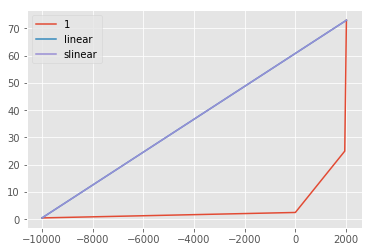

In [83]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from scipy.interpolate import lagrange

from scipy.interpolate import interp1d
plt.style.use('ggplot')
pd.DataFrame({'1':[0.5,2.5,25,67,73]}).set_index([[-10000,0,1950,2007,2015]]).plot()
y=[0.5,2.5,25,67,73]
x=[-10000,0,1950,2007,2015]
x_pred=np.linspace(-10000,2015,num=2)

for i in ['linear', 'slinear',]:
    f1=interpolate.spline(x,y,x_pred)
    plt.plot(x_pred,f1,label=i)
    
plt.legend()


In [66]:
lagrange(x,y)

poly1d([-9.06419103e-12, -2.47559056e-08,  5.65797749e-04, -9.30422975e-01,
        2.50000000e+00])

In [74]:
from scipy.interpolate import *
interpolate.spline(x,y,x_pred)

C:\Users\d\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: `spline` is deprecated!
spline is deprecated in scipy 0.19.0, use Bspline class instead.
  


array([ 5.00000002e-01,  1.04929107e+02,  2.08884402e+02,  3.12366689e+02,
        4.15376772e+02,  5.17915457e+02,  6.19983545e+02,  7.21581843e+02,
        8.22711153e+02,  9.23372280e+02,  1.02356603e+03,  1.12329320e+03,
        1.22255460e+03,  1.32135104e+03,  1.41968331e+03,  1.51755222e+03,
        1.61495858e+03,  1.71190319e+03,  1.80838686e+03,  1.90441038e+03,
        1.99997456e+03,  2.09508021e+03,  2.18972813e+03,  2.28391912e+03,
        2.37765399e+03,  2.47093354e+03,  2.56375858e+03,  2.65612991e+03,
        2.74804834e+03,  2.83951466e+03,  2.93052969e+03,  3.02109422e+03,
        3.11120906e+03,  3.20087502e+03,  3.29009290e+03,  3.37886350e+03,
        3.46718763e+03,  3.55506609e+03,  3.64249969e+03,  3.72948922e+03,
        3.81603550e+03,  3.90213933e+03,  3.98780151e+03,  4.07302284e+03,
        4.15780413e+03,  4.24214619e+03,  4.32604982e+03,  4.40951582e+03,
        4.49254499e+03,  4.57513815e+03,  4.65729609e+03,  4.73901962e+03,
        4.82030954e+03,  